In [20]:
import sys
import numpy
from scipy import sparse
import matplotlib.pyplot as plt

# Simple two point BVP

Given equation $$-y''(x) +q(x)y(x) = f(x), 0<x<1, y(a)=y(b)=0$$ and $$ q(x)=x, f(x)=12x^2-20x^3-x^5+x^6 $$ solve the system

In [70]:
a = 0
b = 1
N = 10000 # number of steps
dx = (b-a) / N #delta x
y0 = 0 # this is value of y(0)
y1 = 0 # this is value of y(1)

q = lambda x: x
f = lambda x: 12*x**2 - 20*x**3 - x**5 + x**6

A = np.zeros(N)
B = np.zeros(N+1)
C = np.zeros(N)
xs = np.zeros(N)
F = np.zeros(N)
y = np.zeros(N)

Prepare the A, B and C vectors and fill the matrix M. Adjust A, B and C in the first and last rows. Calculate also vector F

In [71]:
for i in range(0, N):
    xs[i] = xs[i-1] + dx
    A[i] = 1/(dx**2)
    B[i] = -2/(dx**2) + xs[i]
    C[i] = 1/(dx**2)
C[0] = A[N-1] = 0
B[0] = B[N] = 1

diagonals = [B,A,C]
a = B.shape[0]
M = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

for i in range(1, N):
    F[i] = f(xs[i])

Use equations 𐖈 and 𐕳 from slide 34 (it would be easier if they were numbered). I also assumed that there should be $F_i = F_i - pF_{i-1}$ instead of $F_i = F_i - pF_{i-a}$ like in the presentation, as parameter $a$ is nowhere else to be found

In [73]:
for i in range(1,N):
    p = A[i]/B[i-1]
    B[i] = B[i] - p*C[i-1]
    F[i] = F[i] - p*F[i]
    
y[N-1] = F[N-1]/B[N-1]
for i in range(N-2,0, -1):
    y[i] = (F[i] - C[i]*y[i+1]) / B[i]

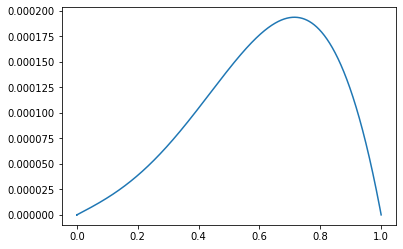

In [74]:
plt.plot(xs, y)

# Rod's temperature

In [81]:
# Rod's parameters
T1 = 200
T2 = 30
Ta = 30
L = 1
alpha = 1

# Approximation parameters
a = 0
b = 1 #|b-a| = L
N = 10 # number of steps
dx = (b-a) / N #delta x

# Prepare vectors
A = np.zeros(N)
B = np.zeros(N+1)
C = np.zeros(N)
xs = np.zeros(N)
F = np.zeros(N)
y = np.zeros(N)

# Functions to fill A, B and C. They appear to be independent of x
p = 0
q = alpha
f = alpha*Ta

In [82]:
for i in range(0, N):
    xs[i] = xs[i-1] + dx
    A[i] = 1/(dx**2)
    B[i] = -2/(dx**2) + alpha
    C[i] = 1/(dx**2)
C[0] = A[N-1] = 0
B[0] = B[N] = 1

diagonals = [B,A,C]
a = B.shape[0]
M = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

for i in range(1, N):
    F[i] = f

In [83]:
for i in range(1,N):
    p = A[i]/B[i-1]
    B[i] = B[i] - p*C[i-1]
    F[i] = F[i] - p*F[i]
    
y[N-1] = F[N-1]/B[N-1]
for i in range(N-2,0, -1):
    y[i] = (F[i] - C[i]*y[i+1]) / B[i]

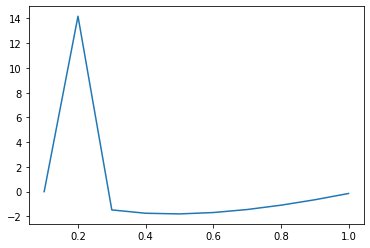

In [84]:
plt.plot(xs, y)